# ***Jupyter Notebook Script***

***Libraries:***

In [1]:
# Importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta 
import matplotlib.pyplot as plt
from datetime import datetime
import time

from sklearn.model_selection   import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import OLS


***Data Cleaning:***

In [2]:
# Establishing the directory from where we will get our inputs
directory = "C:/Users/jpolancoroque/Desktop/.ipynb_checkpoints/dataset tempMod CO_RH"

In [3]:
# Import each one of the databases
t_1 = pd.read_csv(directory + '/20160930_203718.csv')
t_2 = pd.read_csv(directory + '/20161001_231809.csv')
t_3 = pd.read_csv(directory + '/20161003_085624.csv')
t_4 = pd.read_csv(directory + '/20161004_104124.csv')
t_5 = pd.read_csv(directory + '/20161005_140846.csv')
t_6 = pd.read_csv(directory + '/20161006_182224.csv')
t_7 = pd.read_csv(directory + '/20161007_210049.csv')
t_8 = pd.read_csv(directory + '/20161008_234508.csv')
t_9 = pd.read_csv(directory + '/20161010_095046.csv')
t_10 = pd.read_csv(directory + '/20161011_113032.csv')
t_11 = pd.read_csv(directory + '/20161013_143355.csv')
t_12 = pd.read_csv(directory + '/20161014_184659.csv')
t_13 = pd.read_csv(directory + '/20161016_053656.csv')

In [4]:
# Understanding the tables
col_t1 = []
for col in t_1.columns:
    col_t1.append(col)
    
print(col_t1)

['Time (s)', 'CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)', '0.0000', '0.0000.1', '49.7534', '23.7184', '233.2737', '0.8993', '0.2231', '0.6365', '1.1493', '0.8483', '1.2534', '1.4449', '1.9906', '1.3303', '1.4480', '1.9148', '3.4651', '5.2144', '6.5806', '8.6385']


In [5]:
# List of tables
list_j = []
for j in range(1,14):
    list_j.append('t_'+str(j))

In [6]:
# Creating a function to validate if these 'weird' columns are or not useless
def validation(a = t_1):
    for i in range(20,len(a.columns)):
        print('num column',i,':',a.iloc[:,i].unique())

In [7]:
validation(a = t_13)

num column 20 : [nan]
num column 21 : [nan]
num column 22 : [nan]
num column 23 : [nan]
num column 24 : [nan]
num column 25 : [nan]
num column 26 : [nan]
num column 27 : [nan]
num column 28 : [nan]
num column 29 : [nan]
num column 30 : [nan]
num column 31 : [nan]
num column 32 : [nan]
num column 33 : [nan]
num column 34 : [nan]
num column 35 : [nan]
num column 36 : [nan]
num column 37 : [nan]
num column 38 : [nan]
num column 39 : [nan]


In [8]:
# Elimnating extra columns
t_1 = t_1.drop(t_1.iloc[:, 20:].columns, axis = 1)
t_2 = t_2.drop(t_2.iloc[:, 20:].columns, axis = 1)
t_3 = t_3.drop(t_3.iloc[:, 20:].columns, axis = 1)
t_4 = t_4.drop(t_4.iloc[:, 20:].columns, axis = 1)
t_5 = t_5.drop(t_5.iloc[:, 20:].columns, axis = 1)
t_6 = t_6.drop(t_6.iloc[:, 20:].columns, axis = 1)
t_7 = t_7.drop(t_7.iloc[:, 20:].columns, axis = 1)
t_8 = t_8.drop(t_8.iloc[:, 20:].columns, axis = 1)
t_9 = t_9.drop(t_9.iloc[:, 20:].columns, axis = 1)
t_10 = t_10.drop(t_10.iloc[:, 20:].columns, axis = 1)
t_11 = t_11.drop(t_11.iloc[:, 20:].columns, axis = 1)
t_12 = t_12.drop(t_12.iloc[:, 20:].columns, axis = 1)
t_13 = t_13.drop(t_13.iloc[:, 20:].columns, axis = 1)

In [9]:
# Creating a function to look for missing values
def missing(a = t_1):
    print(a.isnull().sum())

In [10]:
missing(a = t_1)

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
dtype: int64


In [11]:
t_1["File"] = 1
t_2["File"] = 2
t_3["File"] = 3
t_4["File"] = 4
t_5["File"] = 5
t_6["File"] = 6
t_7["File"] = 7
t_8["File"] = 8
t_9["File"] = 9
t_10["File"] = 10
t_11["File"] = 11
t_12["File"] = 12
t_13["File"] = 13

In [12]:
t1,t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13 = t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9, t_10, t_11, t_12, t_13

In [13]:
# Transforming datetime variable
d1 = '20160930'
h1 = '203718'
dt_1= datetime.strptime(d1+h1,'%Y%m%d%H%M%S')

d2 = '20161001'
h2 = '231809'
dt_2=datetime.strptime(d2+h2,'%Y%m%d%H%M%S')

d3 = '20161003'
h3 = '085624'
dt_3=datetime.strptime(d3+h3,'%Y%m%d%H%M%S')

d4 = '20161004'
h4 = '104124'
dt_4=datetime.strptime(d4+h4,'%Y%m%d%H%M%S')

d5 = '20161005'
h5 = '140846'
dt_5=datetime.strptime(d5+h5,'%Y%m%d%H%M%S')

d6 = '20161006'
h6 = '182224'
dt_6=datetime.strptime(d6+h6,'%Y%m%d%H%M%S')

d7 = '20161007'
h7 = '210049'
dt_7=datetime.strptime(d7+h7,'%Y%m%d%H%M%S')

d8 = '20161008'
h8 = '234508'
dt_8=datetime.strptime(d8+h8,'%Y%m%d%H%M%S')

d9 = '20161010'
h9 = '095046'
dt_9=datetime.strptime(d9+h9,'%Y%m%d%H%M%S')

d10 = '20161011'
h10 = '113032'
dt_10=datetime.strptime(d10+h10,'%Y%m%d%H%M%S')

d11 = '20161013'
h11 = '143355'
dt_11=datetime.strptime(d11+h11,'%Y%m%d%H%M%S')

d12 = '20161014'
h12 = '184659'
dt_12=datetime.strptime(d12+h12,'%Y%m%d%H%M%S')

d13 = '20161016'
h13 = '053656'
dt_13=datetime.strptime(d13+h13,'%Y%m%d%H%M%S')

***Creating a timeserie variable using file datetime and time variable:***

In [14]:
# Creating new column with the initial date of the file
t1['Date'] = dt_1
t2['Date'] = dt_2
t3['Date'] = dt_3
t4['Date'] = dt_4
t5['Date'] = dt_5
t6['Date'] = dt_6
t7['Date'] = dt_7
t8['Date'] = dt_8
t9['Date'] = dt_9
t10['Date'] = dt_10
t11['Date'] = dt_11
t12['Date'] = dt_12
t13['Date'] = dt_13

In [15]:
# Summing up Date and Time
t1['Date_final'] = pd.to_datetime(t1['Date']) + pd.to_timedelta(t1["Time (s)"], unit='s')
t2['Date_final'] = pd.to_datetime(t2['Date']) + pd.to_timedelta(t2["Time (s)"], unit='s')
t3['Date_final'] = pd.to_datetime(t3['Date']) + pd.to_timedelta(t3["Time (s)"], unit='s')
t4['Date_final'] = pd.to_datetime(t4['Date']) + pd.to_timedelta(t4["Time (s)"], unit='s')
t5['Date_final'] = pd.to_datetime(t5['Date']) + pd.to_timedelta(t5["Time (s)"], unit='s')
t6['Date_final'] = pd.to_datetime(t6['Date']) + pd.to_timedelta(t6["Time (s)"], unit='s')
t7['Date_final'] = pd.to_datetime(t7['Date']) + pd.to_timedelta(t7["Time (s)"], unit='s')
t8['Date_final'] = pd.to_datetime(t8['Date']) + pd.to_timedelta(t8["Time (s)"], unit='s')
t9['Date_final'] = pd.to_datetime(t9['Date']) + pd.to_timedelta(t9["Time (s)"], unit='s')
t10['Date_final'] = pd.to_datetime(t10['Date']) + pd.to_timedelta(t10["Time (s)"], unit='s')
t11['Date_final'] = pd.to_datetime(t11['Date']) + pd.to_timedelta(t11["Time (s)"], unit='s')
t12['Date_final'] = pd.to_datetime(t12['Date']) + pd.to_timedelta(t12["Time (s)"], unit='s')
t13['Date_final'] = pd.to_datetime(t13['Date']) + pd.to_timedelta(t13["Time (s)"], unit='s')

In [16]:
# Concatenating the tables
df = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13])

In [17]:
# Separating Date and Time from the DateTime variable
df['Date'], df['Time'] = df['Date_final'].dt.normalize(), df['Date_final'].dt.time

In [18]:
df['Accum_Sec'] = round(df['Time (s)'].cumsum())

In [19]:
df['Hour'] = pd.to_datetime(df['Date_final']).dt.hour

In [20]:
df['Day'] = pd.to_datetime(df['Date_final']).dt.day

In [21]:
df['Month'] = pd.to_datetime(df['Date_final']).dt.month

In [22]:
df['Year'] = pd.to_datetime(df['Date_final']).dt.year

In [23]:
df['Hour'] = df['Hour'].apply(str)
df['Day'] = df['Day'].apply(str)
df['Month'] = df['Month'].apply(str)
df['Year'] = df['Year'].apply(str)

In [24]:
# Creating a qualitative variable to group the mean observations by hour-day. In the papers, the authors used the last 3 observations every 15 minutes, here we will change a bit the scope
df['YMDH'] = df['Year']+'-'+df['Month']+'-'+df['Day']+'-'+df['Hour']

***Grouping by hour:***

In [25]:
df_grouped = df

In [26]:
df_grouped = df_grouped.groupby('YMDH').mean()

In [27]:
df_grouped.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),...,R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),File,Accum_Sec
YMDH,,,,,,,,,,,,,,,,,,,,,
2016-10-1-0,13963.112102,11.722346,45.914176,26.435316,239.958345,0.355422,12.885497,15.217827,19.471397,16.922848,...,28.474023,21.632850,17.236803,20.914938,23.378659,20.665702,18.072526,23.292962,1.0,3.187379e+08
2016-10-1-1,17562.515114,10.506059,45.365044,26.396516,239.986027,0.355299,14.604942,17.175603,22.114704,18.752215,...,32.462961,23.022275,18.397539,22.222790,24.513566,22.065324,19.705715,24.440926,1.0,5.032032e+08
2016-10-1-10,49962.946010,11.400186,58.287412,26.437339,239.936532,0.355333,12.277473,13.775912,17.715026,12.505610,...,25.289899,24.115005,20.294343,23.921410,25.539791,23.599945,19.512571,26.496989,1.0,4.062618e+09
2016-10-1-11,53561.191522,9.433037,56.980013,26.448234,239.962590,0.355400,9.739857,11.225744,14.382546,10.797821,...,20.844438,24.989546,21.054638,25.935318,27.189001,24.626790,20.422761,28.930095,1.0,4.669843e+09
2016-10-1-12,57159.203257,8.638331,38.886384,26.408302,239.932725,0.355677,13.033780,15.252023,20.683377,19.340416,...,30.700388,28.815903,24.551856,28.274029,30.030160,27.413679,24.202062,31.581184,1.0,5.318567e+09


***Data visualization:***

In [28]:
feature_list = df_grouped[['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']]

In [29]:
# Creating a correlation matrix, this will help us to identify possible relationships among the variables
corr_matrix = round(feature_list.corr())

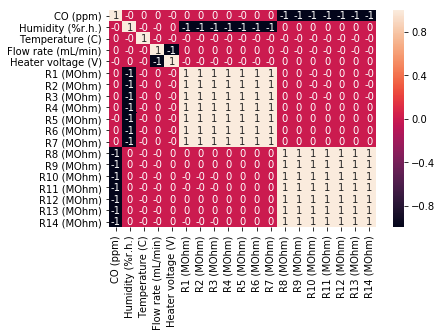

In [30]:
# There is a strong negative correlationship between R8-R14 with CO. The Humidity could be relevant for R1-R7 sensors
sns.heatmap(corr_matrix, annot=True)

In [31]:
# Statistic by feature
feature_list.describe()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,9.725219,46.311272,25.725227,239.756000,0.355258,16.302150,18.332843,22.869704,21.282142,32.432421,29.385497,32.625655,28.287085,23.945525,26.516006,28.670795,26.554975,23.525338,29.587283
std,3.505501,7.840889,0.929552,3.003817,0.002292,4.741827,5.393671,6.068863,5.518285,6.962505,6.835887,6.887945,6.181344,6.319838,6.847111,6.584665,5.894758,5.960848,7.284343
min,0.000000,25.454900,21.920316,185.203067,0.351267,6.742782,6.600105,9.390632,7.404302,12.437078,11.347933,12.901209,13.892834,4.196843,9.867603,12.414273,12.822633,9.154489,12.498459
25%,7.451753,42.336735,25.222189,239.938951,0.354890,13.352038,15.150832,19.353327,17.621683,28.325854,25.524353,28.632793,24.350356,20.044483,22.193903,24.631672,22.899792,19.684160,24.665102
50%,9.884642,47.046848,26.018138,239.958789,0.355090,15.128954,17.010892,21.415217,20.589208,31.522362,28.110319,31.779405,27.629116,23.248959,25.902777,28.050321,25.938311,23.018011,28.931313
75%,11.683705,50.284335,26.392165,239.969127,0.355281,17.722277,19.817698,24.923993,23.921651,35.753126,32.405008,35.932910,31.469363,27.158390,30.047471,32.068394,29.802845,26.811110,33.442019
max,19.387011,68.103738,27.350569,240.019032,0.395767,38.089189,41.420774,47.964240,38.938320,55.580017,53.467820,55.778377,52.618260,50.793360,53.087079,54.440968,50.972643,48.286574,56.569754


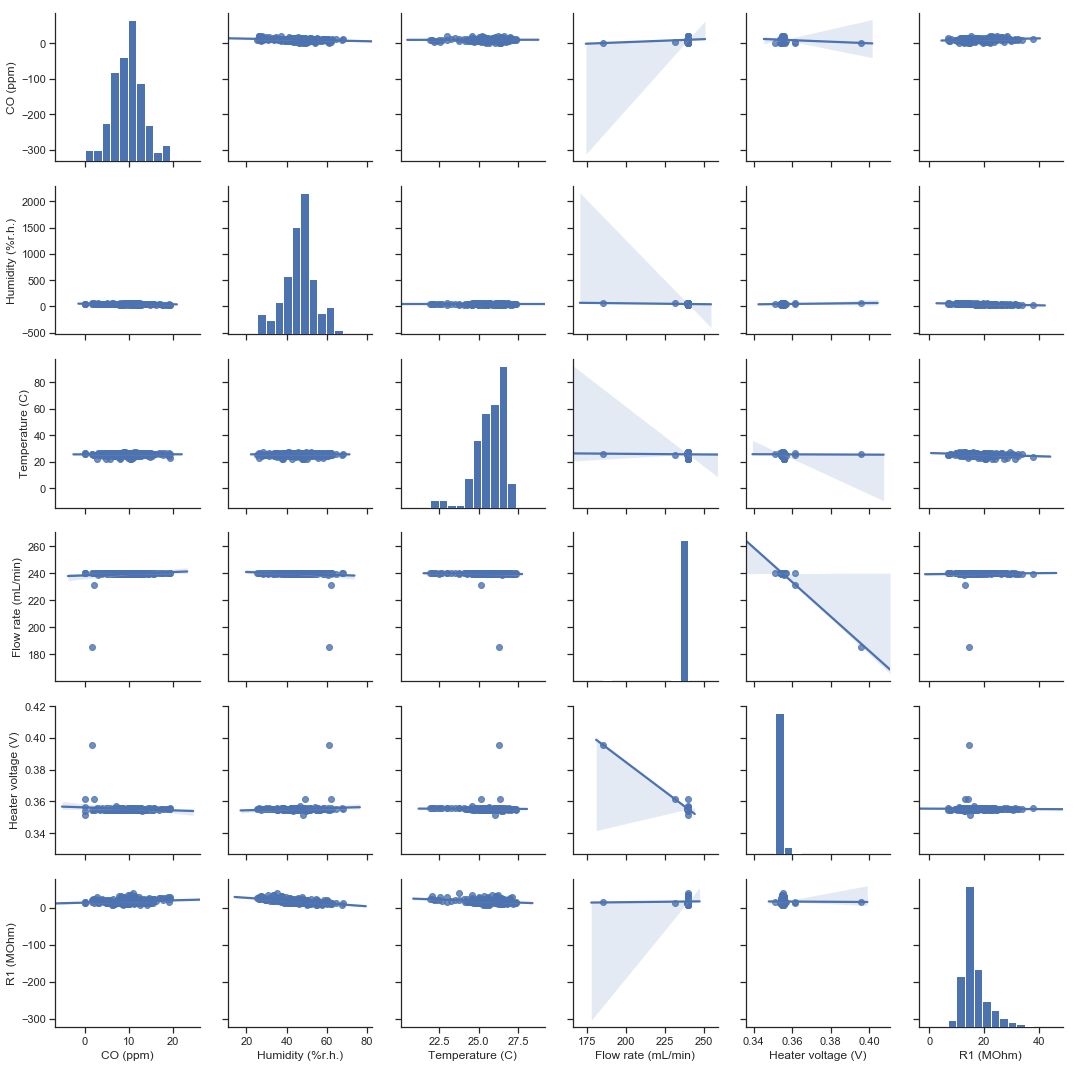

In [32]:
# R1 Pairplot vs Independent Variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)'],kind="reg")

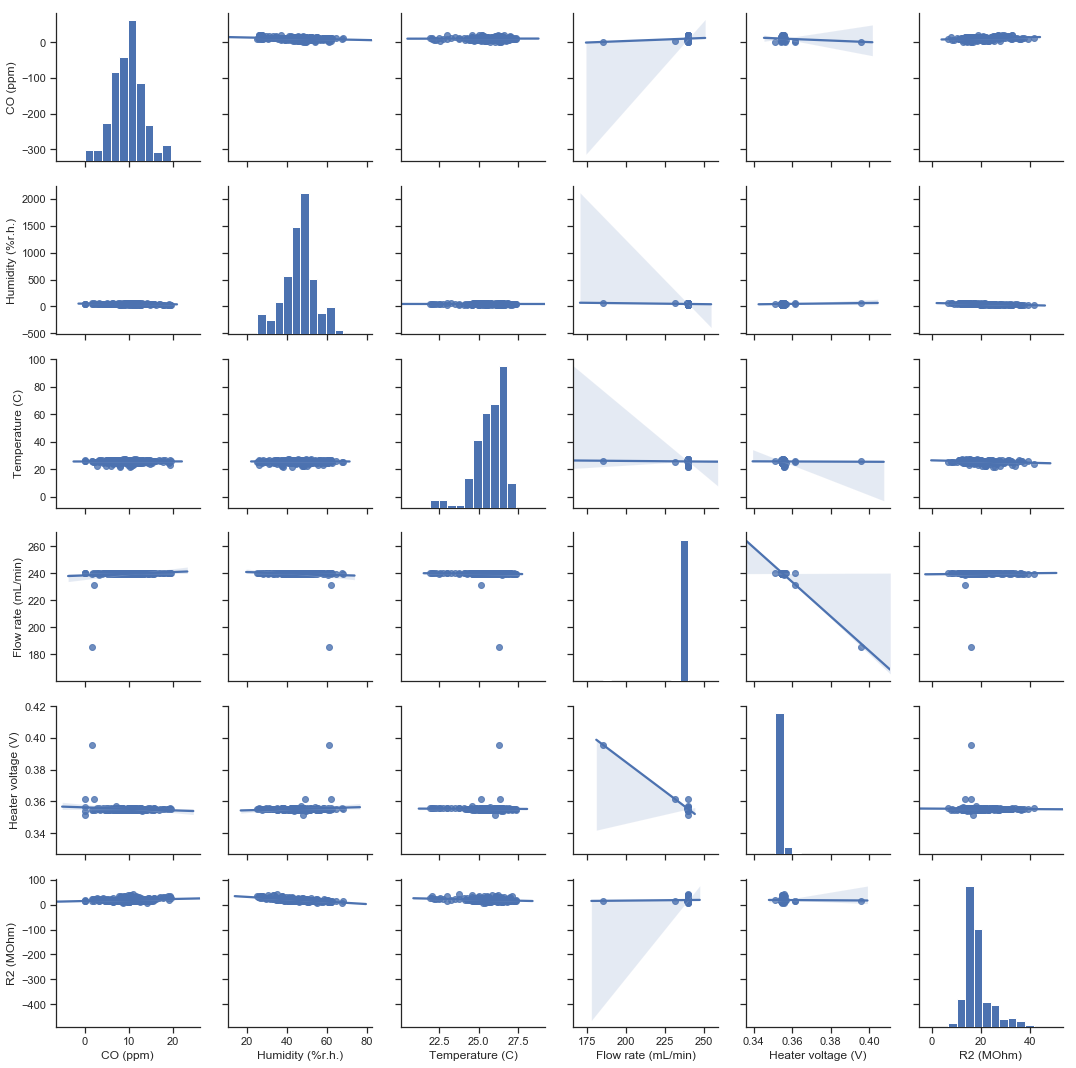

In [33]:
# R2 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R2 (MOhm)'],kind="reg")

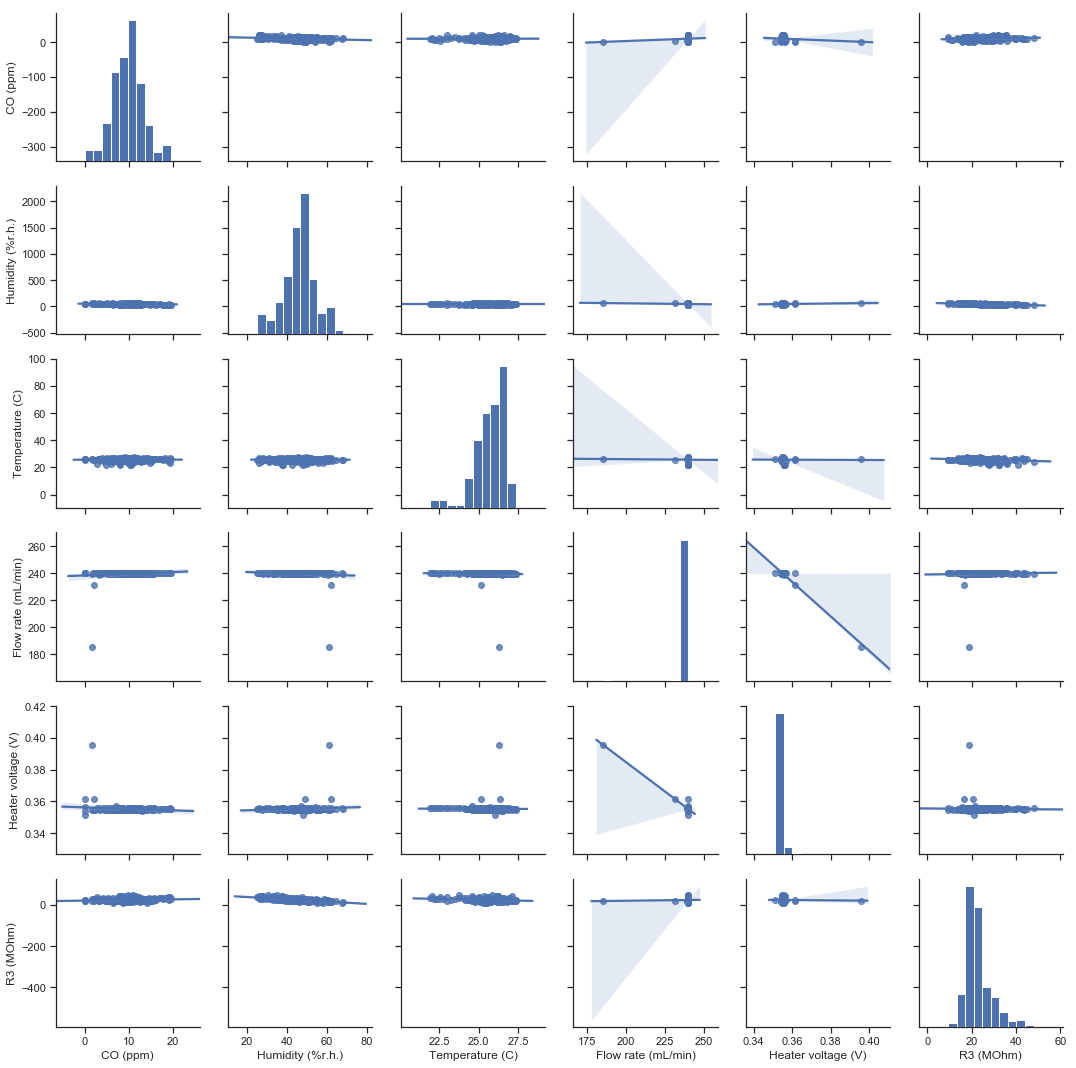

In [34]:
# R3 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R3 (MOhm)'],kind="reg")

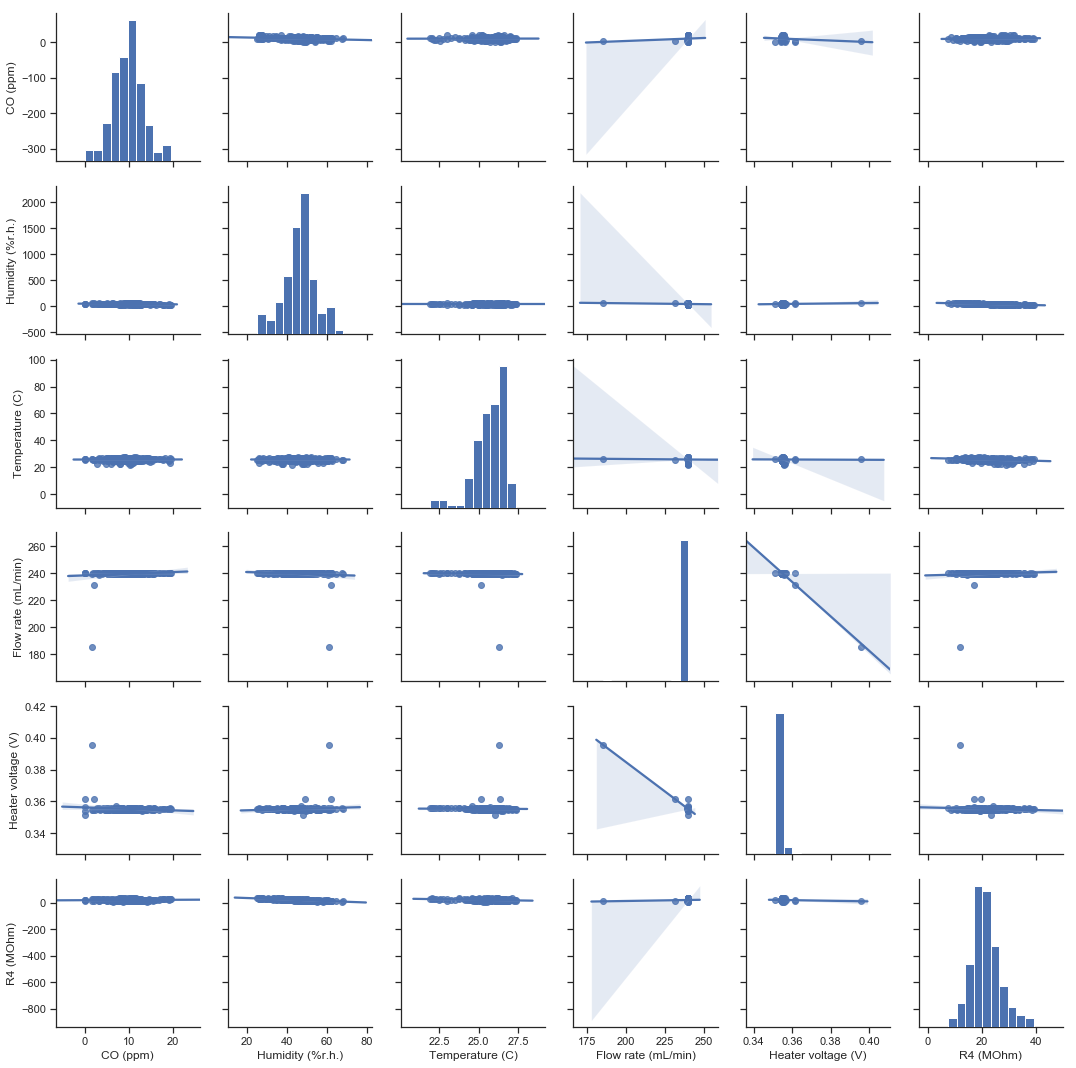

In [35]:
# R4 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R4 (MOhm)'],kind="reg")

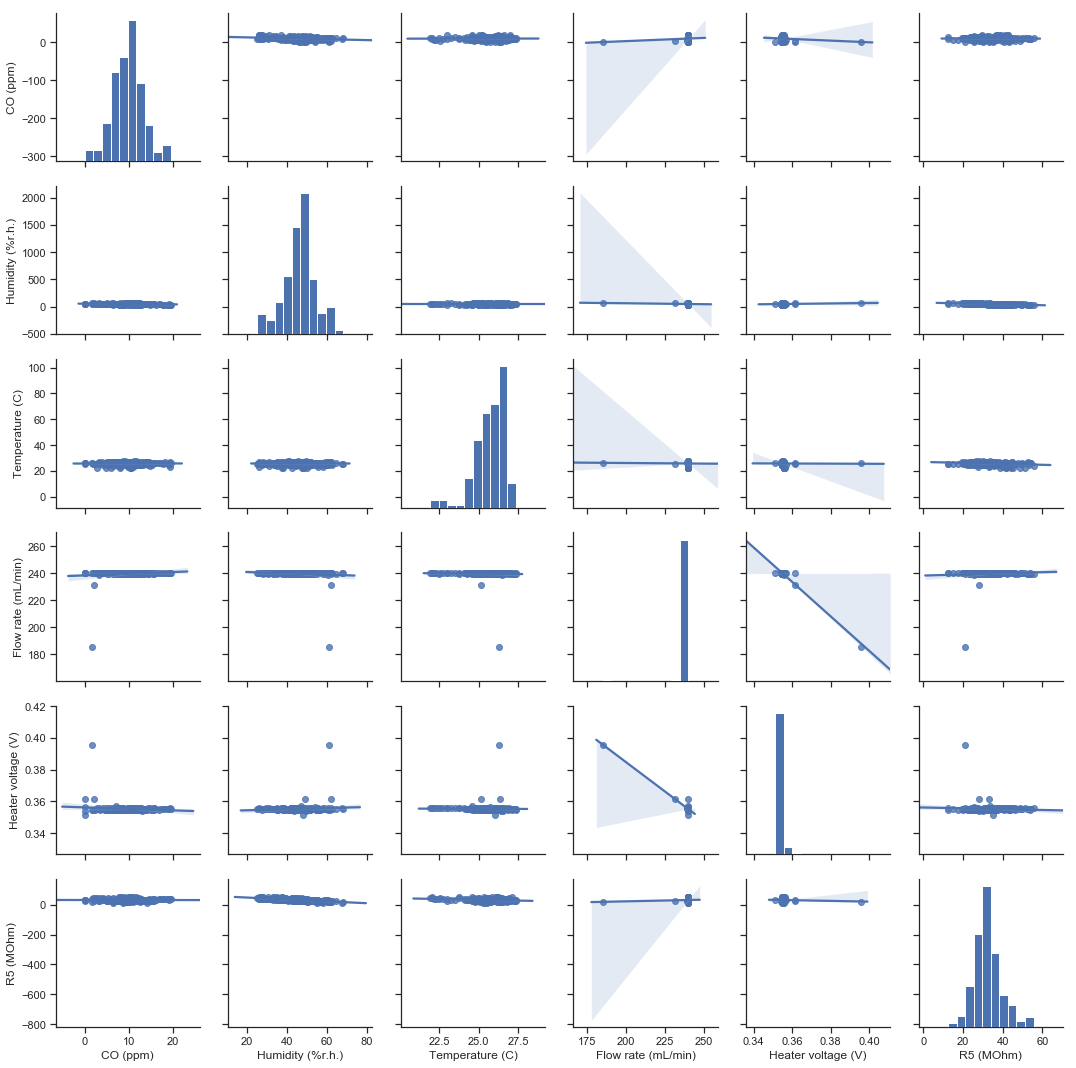

In [36]:
# R5 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R5 (MOhm)'],kind="reg")

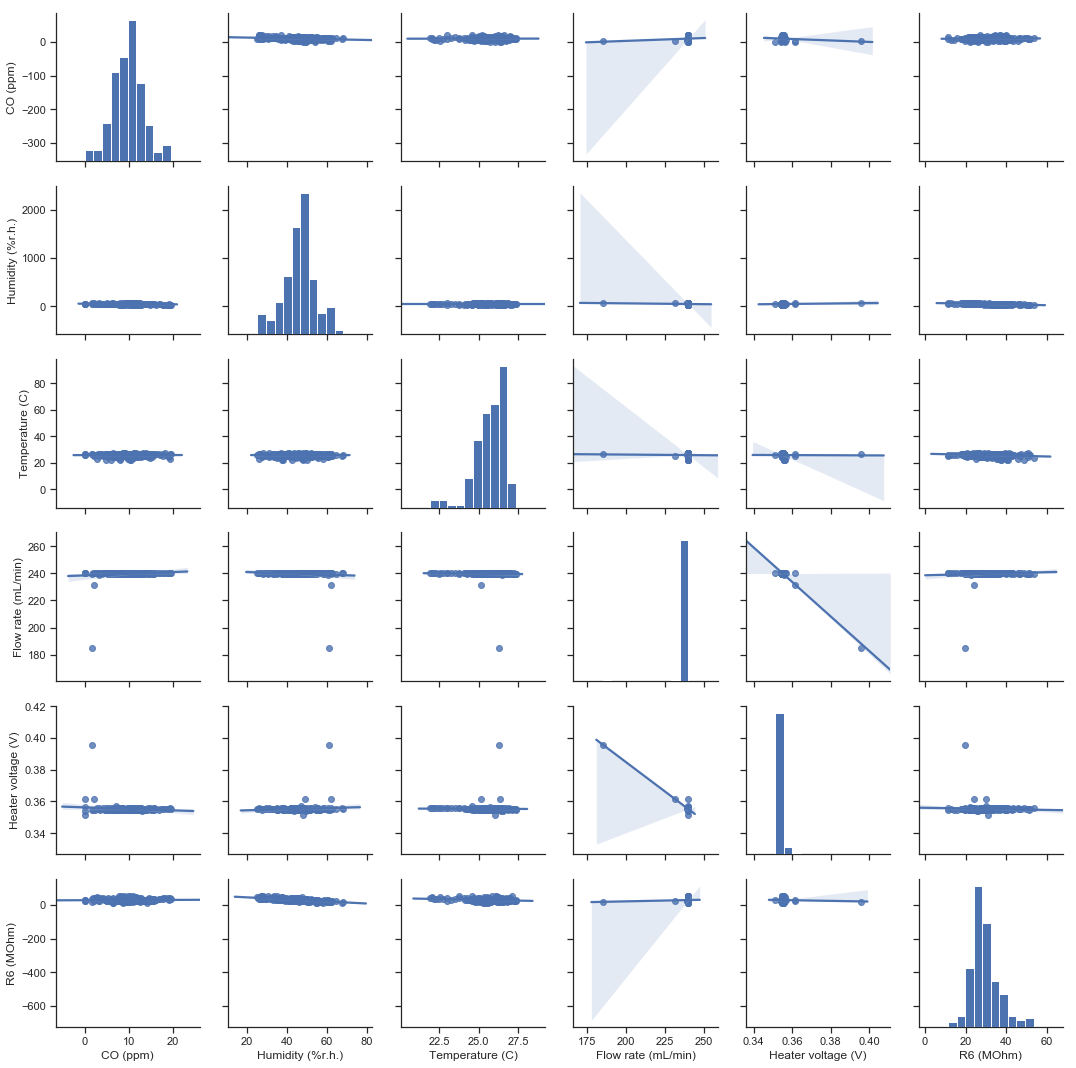

In [37]:
# R6 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R6 (MOhm)'],kind="reg")

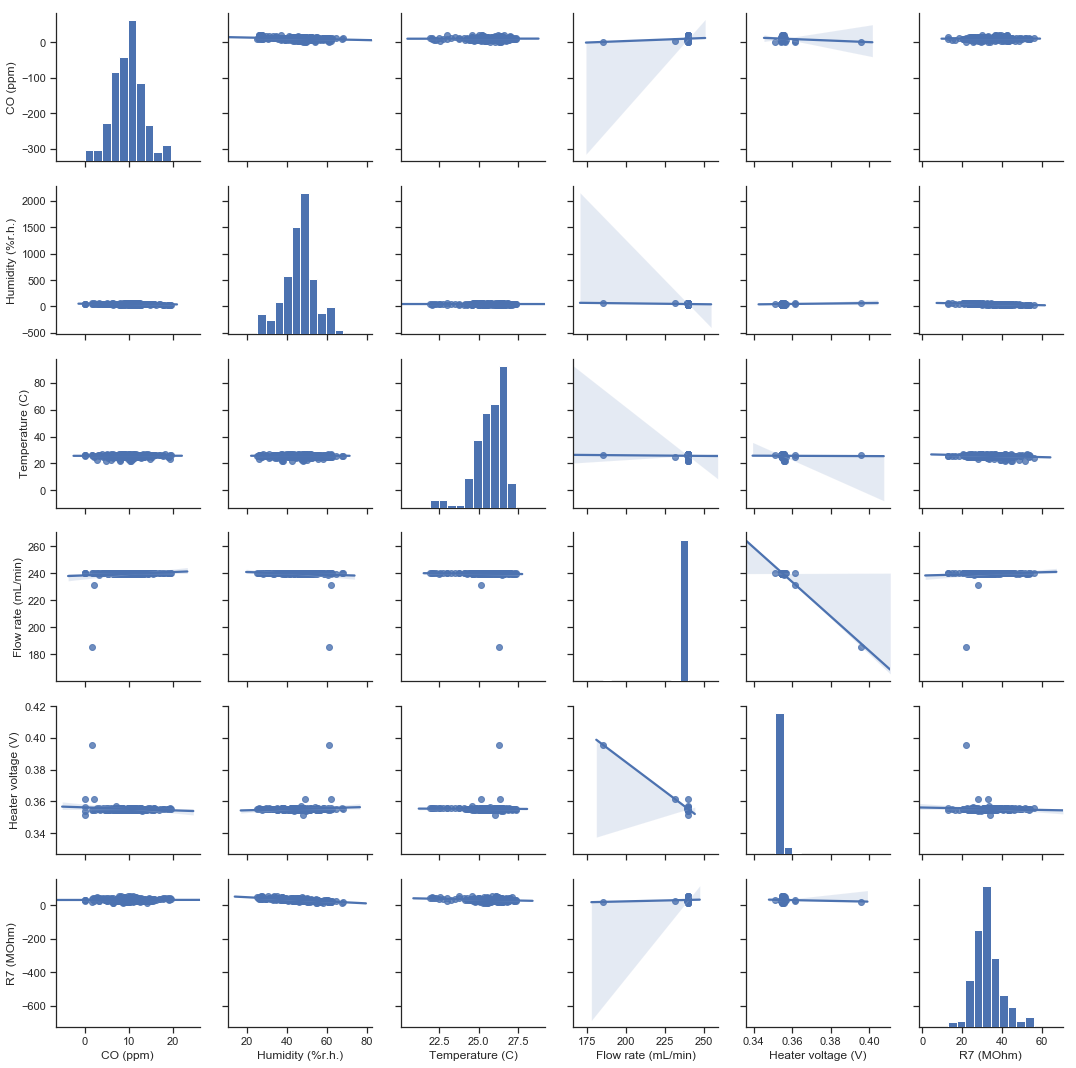

In [38]:
# R7 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R7 (MOhm)'],kind="reg")

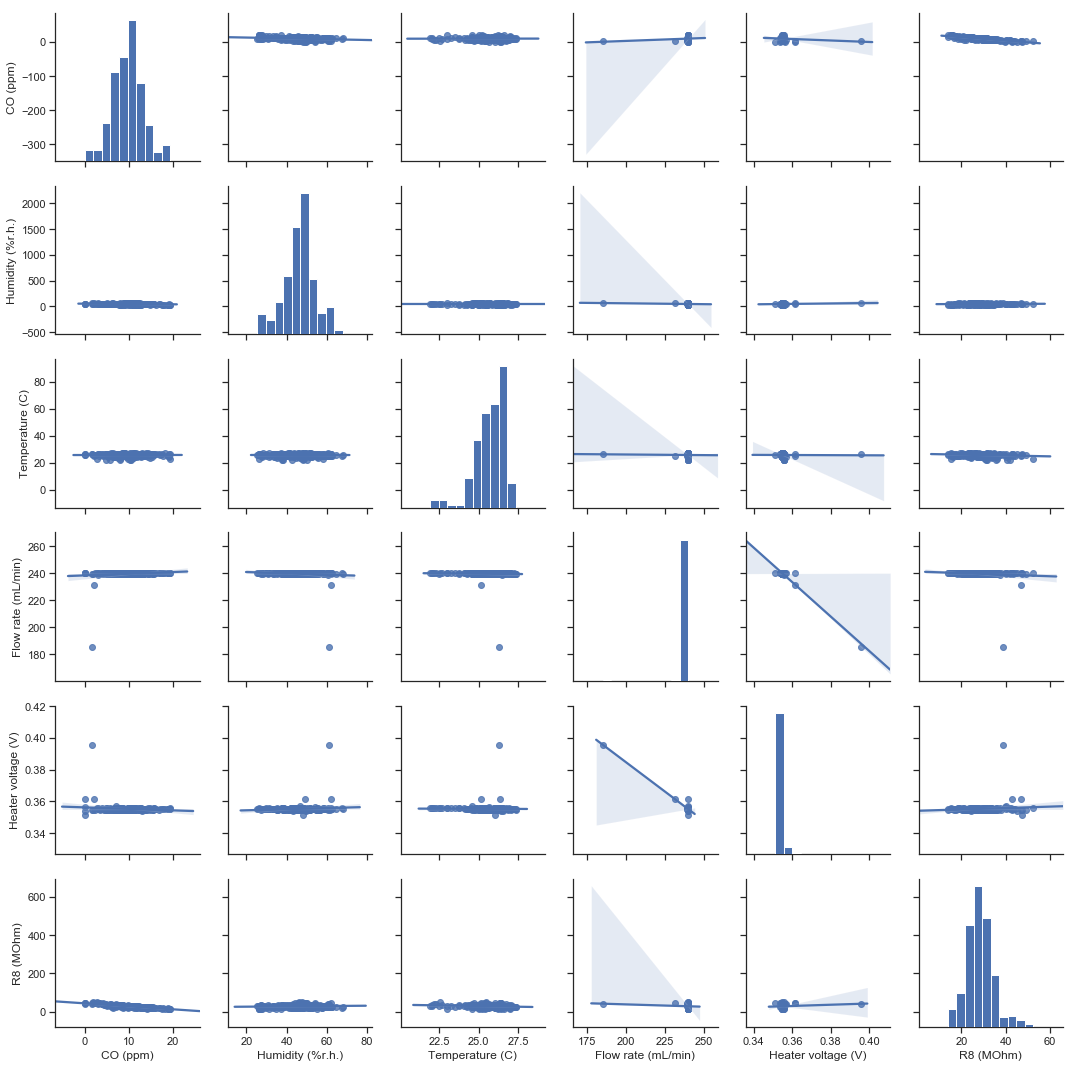

In [39]:
# R8 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R8 (MOhm)'],kind="reg")

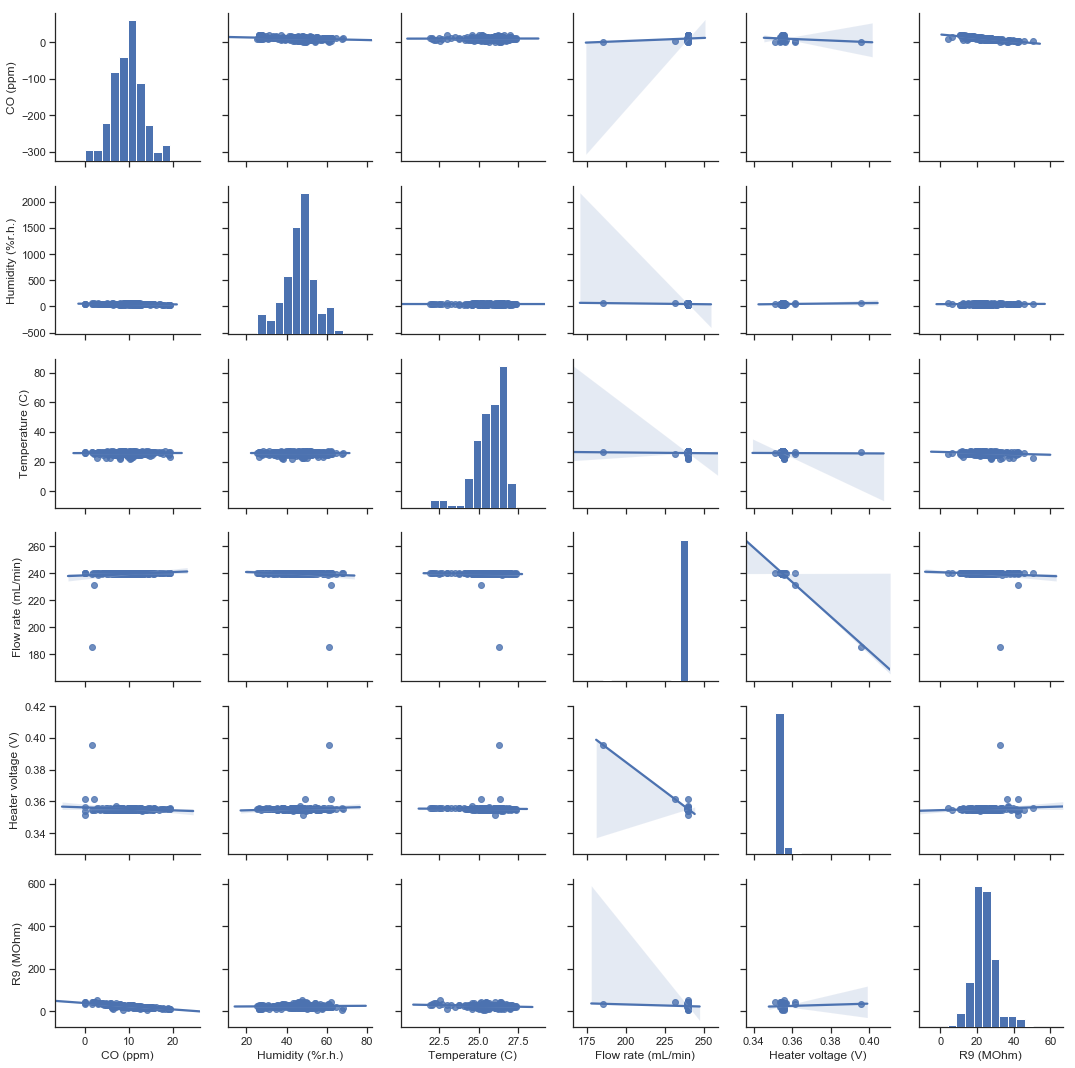

In [40]:
# R9 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R9 (MOhm)'],kind="reg")

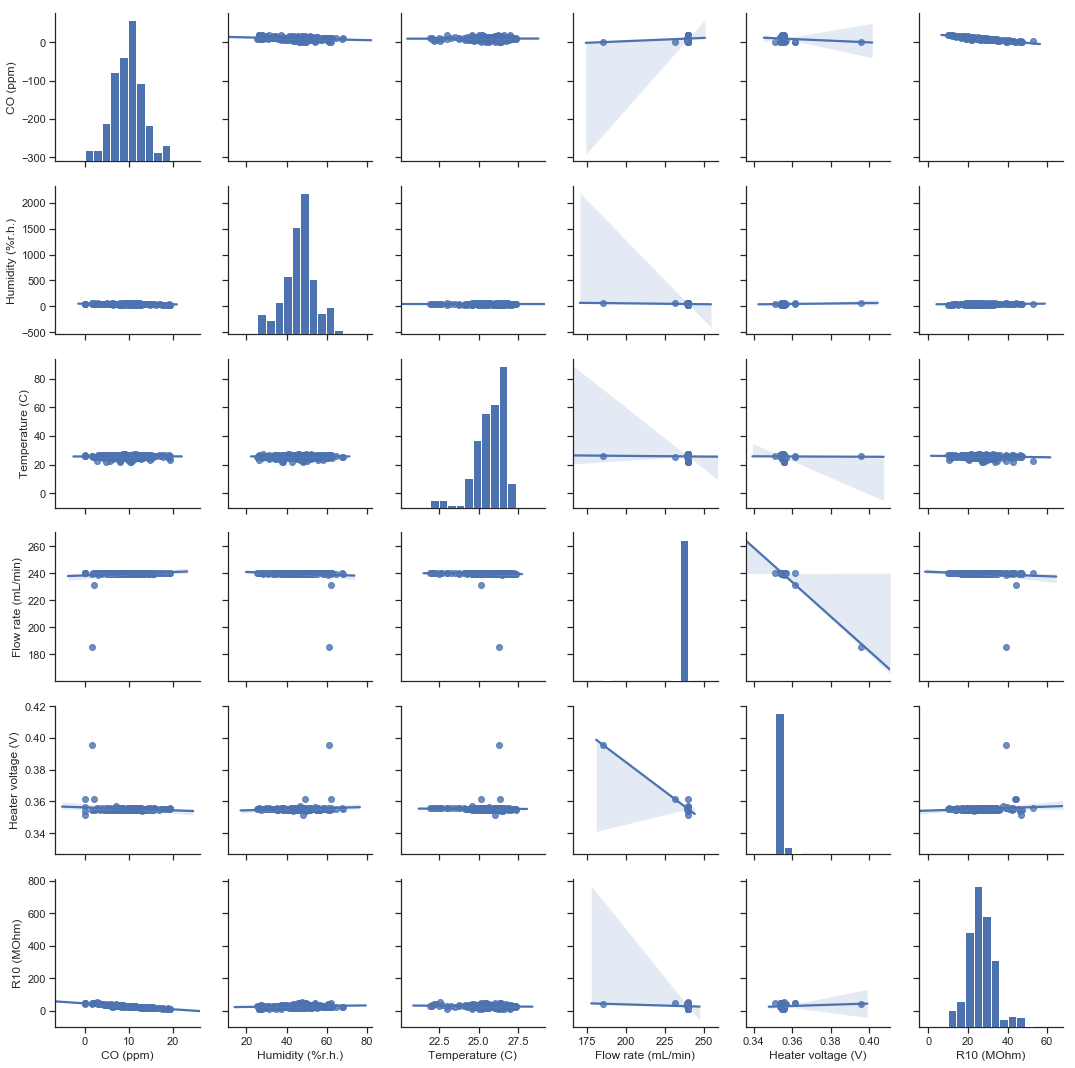

In [41]:
# R10 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R10 (MOhm)'],kind="reg")

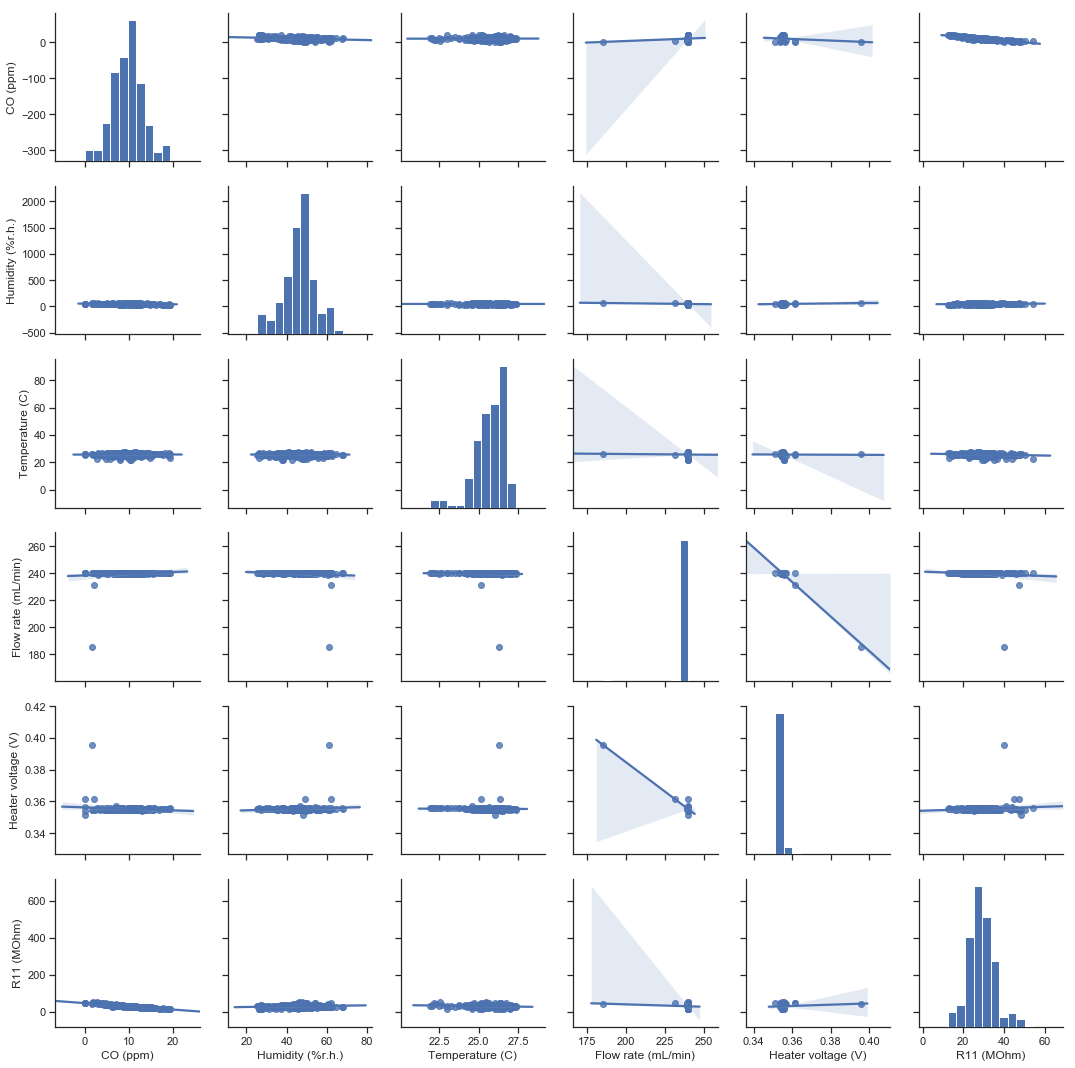

In [42]:
# R11 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R11 (MOhm)'],kind="reg")

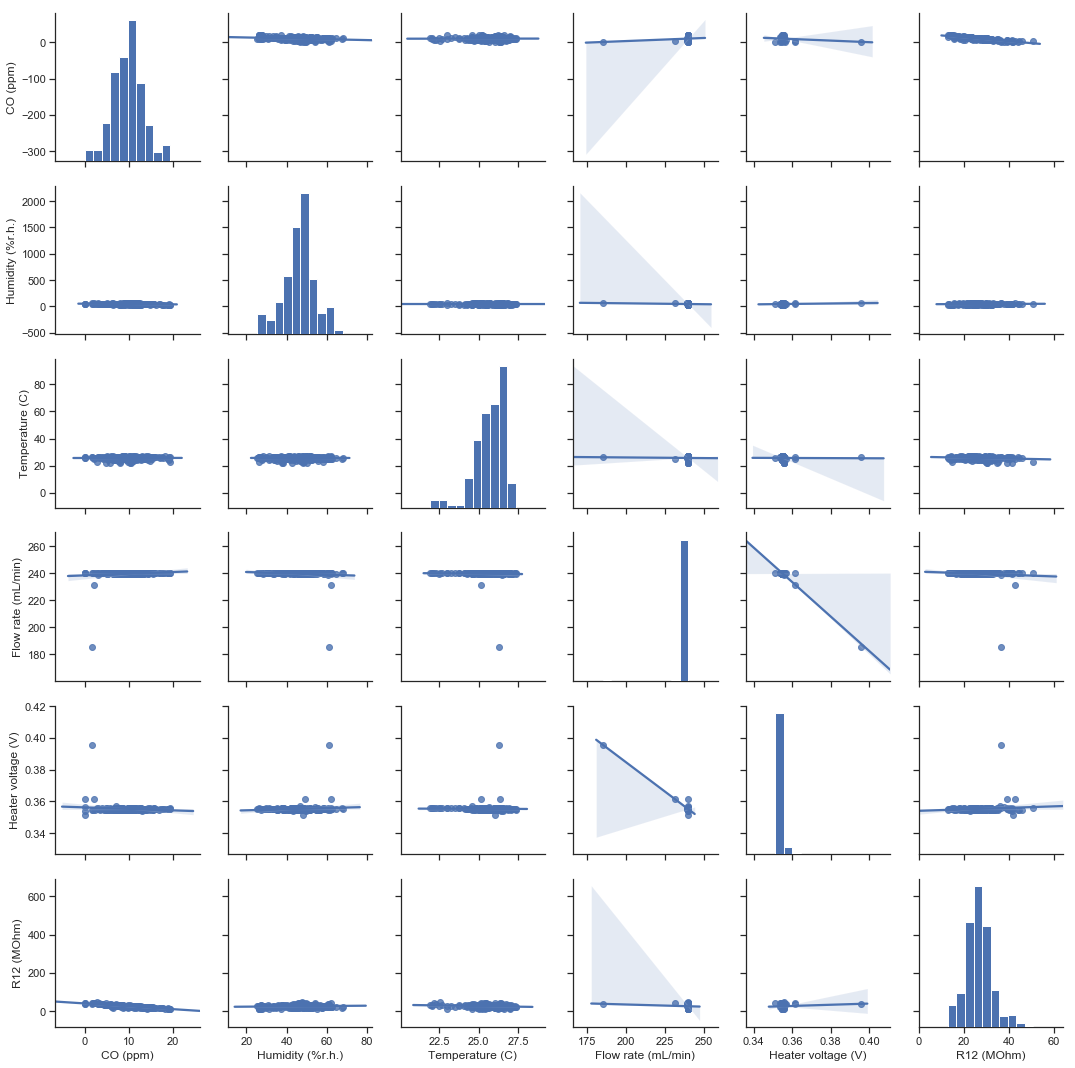

In [43]:
# R12 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R12 (MOhm)'],kind="reg")

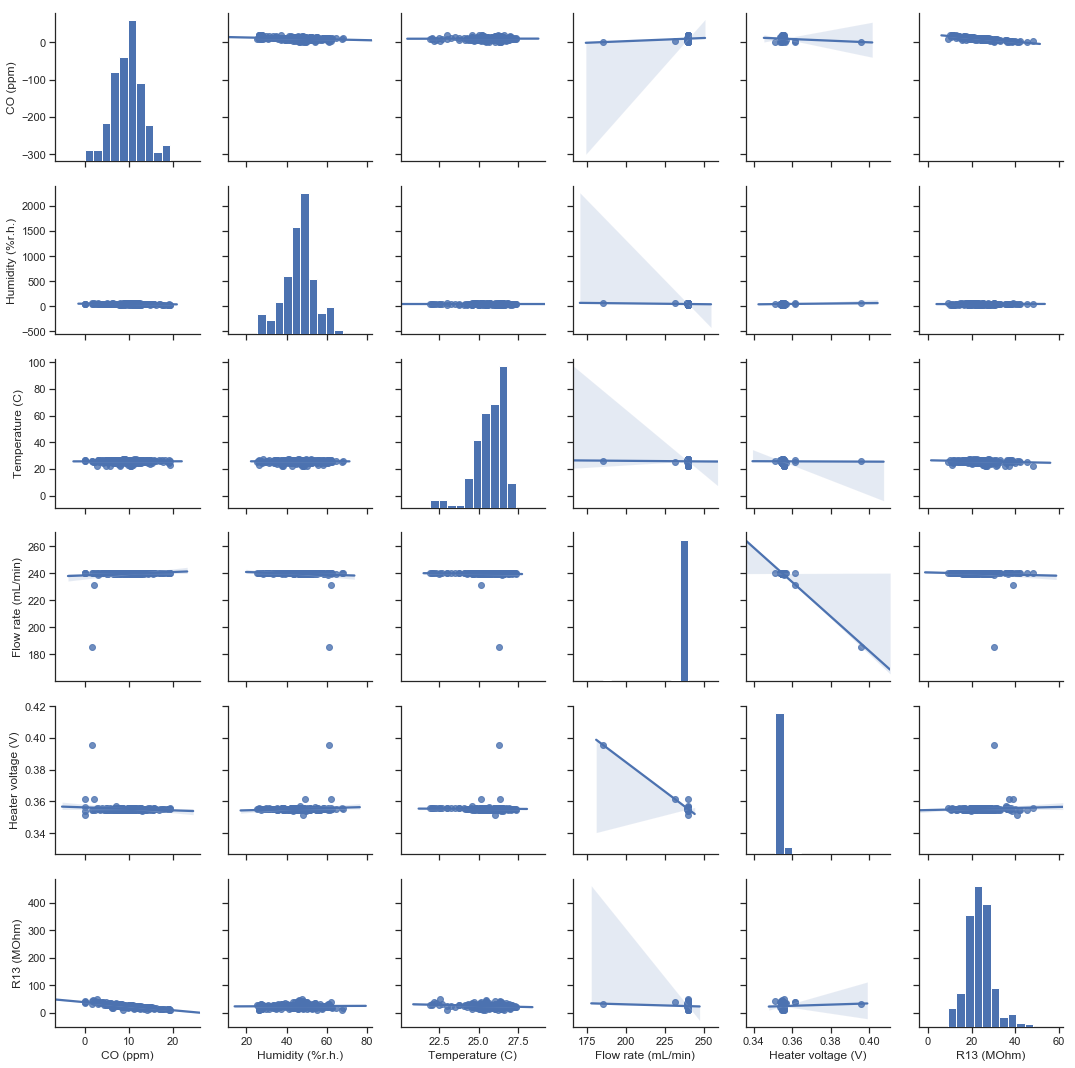

In [44]:
# R13 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R13 (MOhm)'],kind="reg")

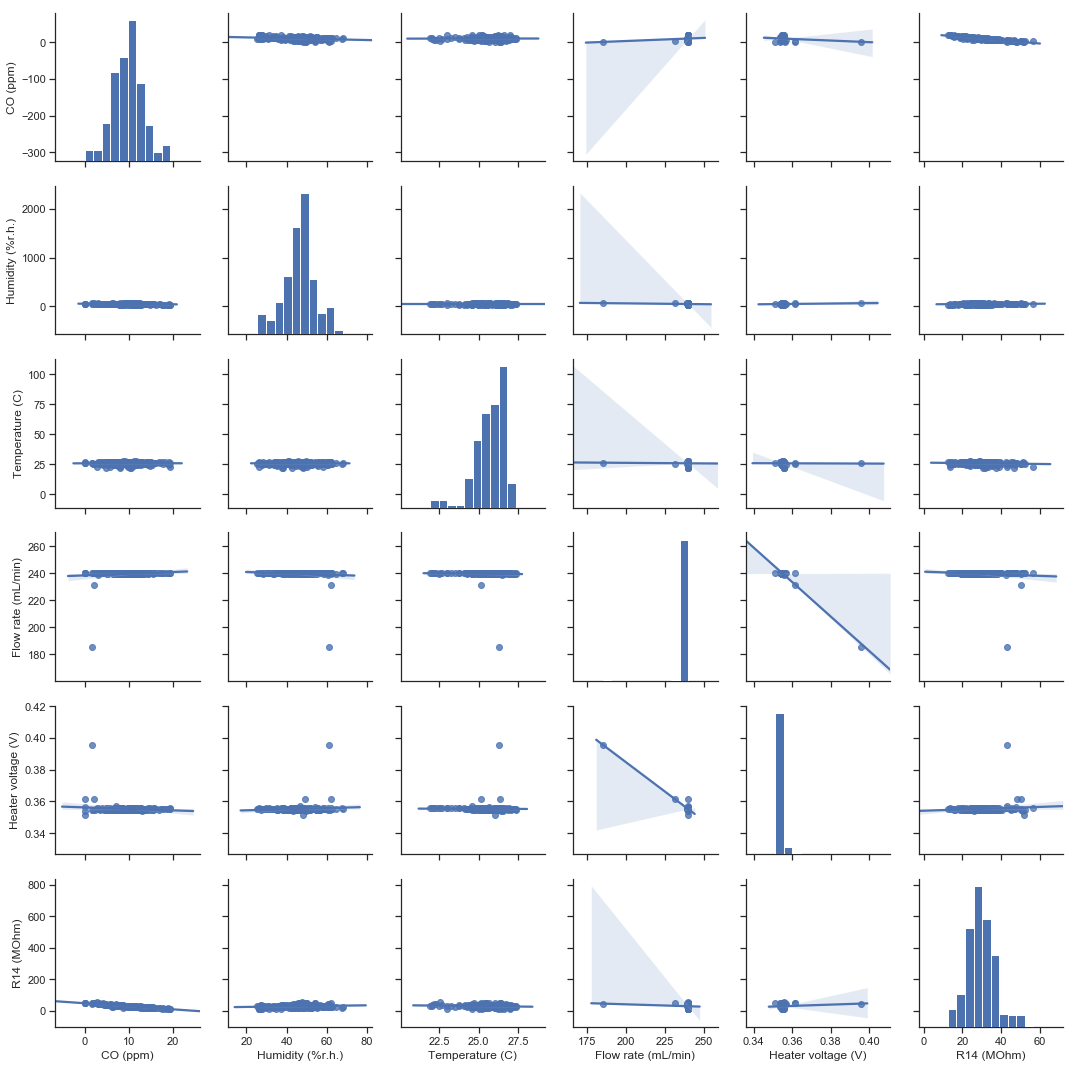

In [45]:
# R14 Pairplot vs Independent Variables
sns.pairplot(feature_list, vars=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R14 (MOhm)'],kind="reg")

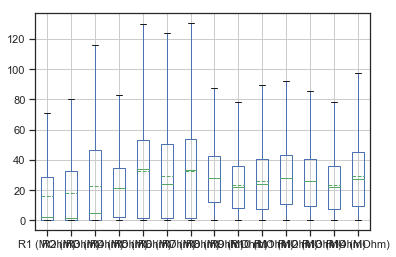

In [46]:
# Boxplot by Sensor. Considering that these outlier could be important, for this analysis will be remained there.
a1=df[['R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']]
ax = a1.boxplot(meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes')

***Modeling:***

a) Time Series: Considering that the correlationship analysis gave us some guideline around the behaviour of our variables. We will analyze only those relationships that seem to be strong. Besides, for time limitation issues, we will reduce the scope by only including the standarized regression. Why? Because by analyzing these we can know which variables are indeed important for the dependent variables. If we want to know by how much, we would have to run another regression but no standarized.

In [47]:
# Modeling R1 vs Humidity
y1 = df_grouped.loc[:,['R1 (MOhm)']].values
X1 = df_grouped.loc[:,['Humidity (%r.h.)']].values

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
y1_scaled = scaler.fit_transform(y1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1_scaled, test_size=0.3, random_state=15)

In [48]:
# There is a significant relationship R1 and Humidity. This can be seen looking at P-value(p < .01) and the t-student
OLS(y1_train,X1_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.369
Model:                            OLS   Adj. R-squared (uncentered):              0.366
Method:                 Least Squares   F-statistic:                              138.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    1.70e-25
Time:                        18:10:41   Log-Likelihood:                         -285.74
No. Observations:                 238   AIC:                                      573.5
Df Residuals:                     237   BIC:                                      576.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6174      0.052    -11.772      0.000      -0.721      -0.514
==============================================================================
Omnibus:                       61.020   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.056
Skew:                           1.304   Prob(JB):                     6.29e-26
Kurtosis:                       5.215   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Here it does not make sense, but I leave this just in case
#model1 = OLS(y1_train,X1_train).fit()
#model1.predict().min()

In [50]:
# Modeling R2 vs Humidity
y2 = df_grouped.loc[:,['R2 (MOhm)']].values
X2 = df_grouped.loc[:,['Humidity (%r.h.)']].values

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
y2_scaled = scaler.fit_transform(y2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R2 and Humidity 
OLS(y2_train,X2_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.469
Method:                 Least Squares   F-statistic:                              211.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    1.09e-34
Time:                        18:10:44   Log-Likelihood:                         -263.31
No. Observations:                 238   AIC:                                      528.6
Df Residuals:                     237   BIC:                                      532.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6943      0.048    -14.546      0.000      -0.788      -0.600
==============================================================================
Omnibus:                       59.101   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.842
Skew:                           1.283   Prob(JB):                     2.32e-24
Kurtosis:                       5.097   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Modeling R3 vs Humidity
y3 = df_grouped.loc[:,['R3 (MOhm)']].values
X3 = df_grouped.loc[:,['Humidity (%r.h.)']].values

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)
y3_scaled = scaler.fit_transform(y3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R3 and Humidity 
OLS(y3_train,X3_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.496
Method:                 Least Squares   F-statistic:                              235.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    2.44e-37
Time:                        18:10:45   Log-Likelihood:                         -258.66
No. Observations:                 238   AIC:                                      519.3
Df Residuals:                     237   BIC:                                      522.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7179      0.047    -15.336      0.000      -0.810      -0.626
==============================================================================
Omnibus:                       48.887   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.835
Skew:                           1.143   Prob(JB):                     7.61e-18
Kurtosis:                       4.652   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Modeling R4 vs Humidity
y4 = df_grouped.loc[:,['R4 (MOhm)']].values
X4 = df_grouped.loc[:,['Humidity (%r.h.)']].values

scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)
y4_scaled = scaler.fit_transform(y4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4_scaled, y4_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R4 and Humidity 
OLS(y4_train,X4_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              426.8
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    6.37e-55
Time:                        18:10:46   Log-Likelihood:                         -215.03
No. Observations:                 238   AIC:                                      432.1
Df Residuals:                     237   BIC:                                      435.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8051      0.039    -20.659      0.000      -0.882      -0.728
==============================================================================
Omnibus:                        8.102   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.060
Skew:                           0.445   Prob(JB):                       0.0178
Kurtosis:                       3.141   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Modeling R5 vs Humidity
y5 = df_grouped.loc[:,['R5 (MOhm)']].values
X5 = df_grouped.loc[:,['Humidity (%r.h.)']].values

scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)
y5_scaled = scaler.fit_transform(y5)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5_scaled, y5_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R5 and Humidity 
OLS(y5_train,X5_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              242.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    3.99e-38
Time:                        18:10:46   Log-Likelihood:                         -253.65
No. Observations:                 238   AIC:                                      509.3
Df Residuals:                     237   BIC:                                      512.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7136      0.046    -15.571      0.000      -0.804      -0.623
==============================================================================
Omnibus:                       14.778   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.356
Skew:                           0.540   Prob(JB):                     0.000281
Kurtosis:                       3.693   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Modeling R6 vs Humidity
y6 = df_grouped.loc[:,['R6 (MOhm)']].values
X6 = df_grouped.loc[:,['Humidity (%r.h.)']].values

scaler = StandardScaler()
X6_scaled = scaler.fit_transform(X6)
y6_scaled = scaler.fit_transform(y6)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6_scaled, y6_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R6 and Humidity 
OLS(y6_train,X6_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.485
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              223.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    4.99e-36
Time:                        18:10:47   Log-Likelihood:                         -258.97
No. Observations:                 238   AIC:                                      519.9
Df Residuals:                     237   BIC:                                      523.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7005      0.047    -14.946      0.000      -0.793      -0.608
==============================================================================
Omnibus:                       21.459   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.024
Skew:                           0.700   Prob(JB):                     3.68e-06
Kurtosis:                       3.749   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Modeling R7 vs Humidity
y7 = df_grouped.loc[:,['R7 (MOhm)']].values
X7 = df_grouped.loc[:,['Humidity (%r.h.)']].values

scaler = StandardScaler()
X7_scaled = scaler.fit_transform(X7)
y7_scaled = scaler.fit_transform(y7)

X7_train, X7_test, y7_train, y7_test = train_test_split(X7_scaled, y7_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R7 and Humidity 
OLS(y7_train,X7_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.485
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              222.8
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    5.83e-36
Time:                        18:10:48   Log-Likelihood:                         -257.91
No. Observations:                 238   AIC:                                      517.8
Df Residuals:                     237   BIC:                                      521.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6965      0.047    -14.926      0.000      -0.788      -0.605
==============================================================================
Omnibus:                       13.481   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.627
Skew:                           0.514   Prob(JB):                     0.000666
Kurtosis:                       3.646   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Modeling R8 vs Humidity
y8 = df_grouped.loc[:,['R8 (MOhm)']].values
X8 = df_grouped.loc[:,['CO (ppm)']].values

scaler = StandardScaler()
X8_scaled = scaler.fit_transform(X8)
y8_scaled = scaler.fit_transform(y8)

X8_train, X8_test, y8_train, y8_test = train_test_split(X8_scaled, y8_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R8 and CO 
OLS(y8_train,X8_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              960.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    2.51e-85
Time:                        18:10:49   Log-Likelihood:                         -150.44
No. Observations:                 238   AIC:                                      302.9
Df Residuals:                     237   BIC:                                      306.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9124      0.029    -30.990      0.000      -0.970      -0.854
==============================================================================
Omnibus:                       22.554   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.800
Skew:                           0.421   Prob(JB):                     3.43e-12
Kurtosis:                       5.149   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Modeling R9 vs Humidity
y9 = df_grouped.loc[:,['R9 (MOhm)']].values
X9 = df_grouped.loc[:,['CO (ppm)']].values

scaler = StandardScaler()
X9_scaled = scaler.fit_transform(X9)
y9_scaled = scaler.fit_transform(y9)

X9_train, X9_test, y9_train, y9_test = train_test_split(X9_scaled, y9_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R9 and CO 
OLS(y9_train,X9_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              727.0
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    3.71e-74
Time:                        18:10:49   Log-Likelihood:                         -175.87
No. Observations:                 238   AIC:                                      353.7
Df Residuals:                     237   BIC:                                      357.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8834      0.033    -26.963      0.000      -0.948      -0.819
==============================================================================
Omnibus:                       29.046   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.715
Skew:                           0.490   Prob(JB):                     1.09e-18
Kurtosis:                       5.717   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Modeling R10 vs Humidity
y10 = df_grouped.loc[:,['R10 (MOhm)']].values
X10 = df_grouped.loc[:,['CO (ppm)']].values

scaler = StandardScaler()
X10_scaled = scaler.fit_transform(X10)
y10_scaled = scaler.fit_transform(y10)

X10_train, X10_test, y10_train, y10_test = train_test_split(X10_scaled, y10_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R10 and CO 
OLS(y10_train,X10_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              1756.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                   1.41e-111
Time:                        18:10:50   Log-Likelihood:                         -89.789
No. Observations:                 238   AIC:                                      181.6
Df Residuals:                     237   BIC:                                      185.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9564      0.023    -41.908      0.000      -1.001      -0.911
==============================================================================
Omnibus:                       63.745   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.234
Skew:                           1.061   Prob(JB):                     3.72e-51
Kurtosis:                       7.349   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Modeling R11 vs Humidity
y11 = df_grouped.loc[:,['R11 (MOhm)']].values
X11 = df_grouped.loc[:,['CO (ppm)']].values

scaler = StandardScaler()
X11_scaled = scaler.fit_transform(X11)
y11_scaled = scaler.fit_transform(y11)

X11_train, X11_test, y11_train, y11_test = train_test_split(X11_scaled, y11_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R11 and CO 
OLS(y11_train,X11_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              1671.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                   2.56e-109
Time:                        18:10:51   Log-Likelihood:                         -95.063
No. Observations:                 238   AIC:                                      192.1
Df Residuals:                     237   BIC:                                      195.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9537      0.023    -40.875      0.000      -1.000      -0.908
==============================================================================
Omnibus:                       69.153   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.998
Skew:                           1.196   Prob(JB):                     1.14e-50
Kurtosis:                       7.180   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Modeling R12 vs Humidity
y12 = df_grouped.loc[:,['R12 (MOhm)']].values
X12 = df_grouped.loc[:,['CO (ppm)']].values

scaler = StandardScaler()
X12_scaled = scaler.fit_transform(X12)
y12_scaled = scaler.fit_transform(y12)

X12_train, X12_test, y12_train, y12_test = train_test_split(X12_scaled, y12_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R12 and CO 
OLS(y12_train,X12_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              981.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    3.17e-86
Time:                        18:10:52   Log-Likelihood:                         -148.51
No. Observations:                 238   AIC:                                      299.0
Df Residuals:                     237   BIC:                                      302.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9149      0.029    -31.328      0.000      -0.972      -0.857
==============================================================================
Omnibus:                       37.920   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.319
Skew:                           0.672   Prob(JB):                     4.97e-24
Kurtosis:                       6.003   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Modeling R13 vs Humidity
y13 = df_grouped.loc[:,['R13 (MOhm)']].values
X13 = df_grouped.loc[:,['CO (ppm)']].values

scaler = StandardScaler()
X13_scaled = scaler.fit_transform(X13)
y13_scaled = scaler.fit_transform(y13)

X13_train, X13_test, y13_train, y13_test = train_test_split(X13_scaled, y13_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R13 and CO 
OLS(y13_train,X13_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              855.0
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    1.40e-80
Time:                        18:10:53   Log-Likelihood:                         -162.20
No. Observations:                 238   AIC:                                      326.4
Df Residuals:                     237   BIC:                                      329.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9045      0.031    -29.240      0.000      -0.965      -0.844
==============================================================================
Omnibus:                       32.475   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.738
Skew:                           0.670   Prob(JB):                     1.18e-15
Kurtosis:                       5.266   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Modeling R13 vs Humidity
y13 = df_grouped.loc[:,['R13 (MOhm)']].values
X13 = df_grouped.loc[:,['CO (ppm)']].values

scaler = StandardScaler()
X13_scaled = scaler.fit_transform(X13)
y13_scaled = scaler.fit_transform(y13)

X13_train, X13_test, y13_train, y13_test = train_test_split(X13_scaled, y13_scaled, test_size=0.3, random_state=15)

# There is a significant relationship R13 and CO 
OLS(y13_train,X13_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              855.0
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                    1.40e-80
Time:                        18:10:54   Log-Likelihood:                         -162.20
No. Observations:                 238   AIC:                                      326.4
Df Residuals:                     237   BIC:                                      329.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9045      0.031    -29.240      0.000      -0.965      -0.844
==============================================================================
Omnibus:                       32.475   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.738
Skew:                           0.670   Prob(JB):                     1.18e-15
Kurtosis:                       5.266   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b) Time Series (ARIMAS): For this case, we are going to analyze the ARIMA by hour. First of all, we have to understand if the sensors present a starionary behaviour, in which case it would be appropiate the using of ARIMAS. Through these models, one could understand whether or not the past periods of the variables and/or the error are affecting the future performance of the sensors. 

***IMPORTANT:*** Any of the following models presented stationarity; therefore, no ARIMA model was ran. We could induce the stationarity; but for purposes of this case we are not going to do it.

In [138]:
df_grouped2 = df.groupby('Hour').mean()

In [139]:
df_grouped2.reset_index(drop=False, inplace=True)

ADF Statistic: -2.432320
p-value: 0.132821


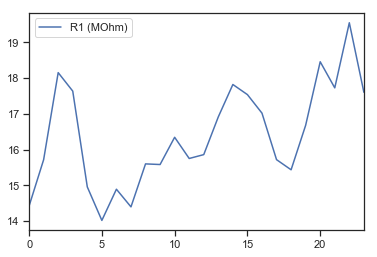

In [145]:
# Time Serie - R1
serie_1 = df_grouped2[["Hour","R1 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_1.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_1.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.720648
p-value: 0.841329


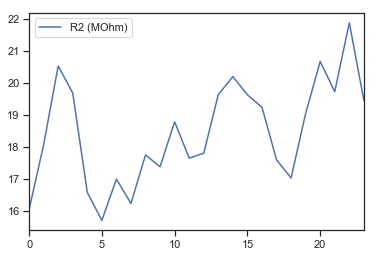

In [146]:
# Time Serie - R2
serie_2 = df_grouped2[["Hour","R2 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_2.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_2.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -2.765312
p-value: 0.063402


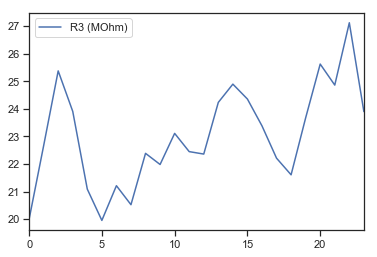

In [147]:
# Time Serie - R3
serie_3 = df_grouped2[["Hour","R3 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_3.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_3.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.362373
p-value: 0.916194


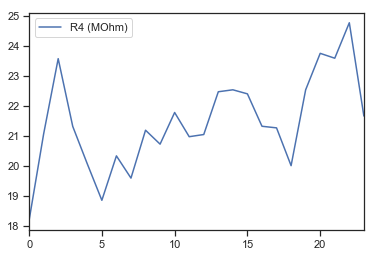

In [150]:
# Time Serie - R4
serie_4 = df_grouped2[["Hour","R4 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_4.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_4.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.970183
p-value: 0.763984


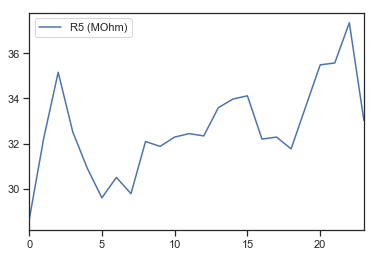

In [151]:
# Time Serie - R5
serie_5 = df_grouped2[["Hour","R5 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_5.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_5.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.761579
p-value: 0.830148


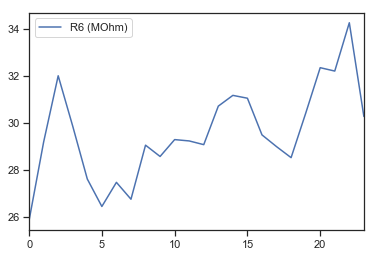

In [152]:
# Time Serie - R6
serie_6 = df_grouped2[["Hour","R6 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_6.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_6.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.907374
p-value: 0.785534


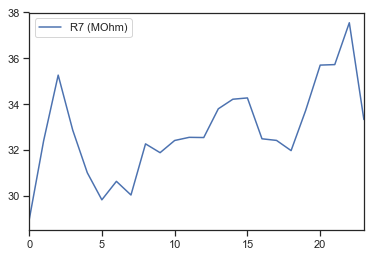

In [153]:
# Time Serie - R7
serie_7 = df_grouped2[["Hour","R7 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_7.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_7.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.809197
p-value: 0.816406


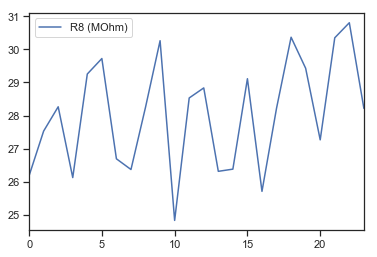

In [154]:
# Time Serie - R8
serie_8 = df_grouped2[["Hour","R8 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_8.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_8.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -1.028719
p-value: 0.742646


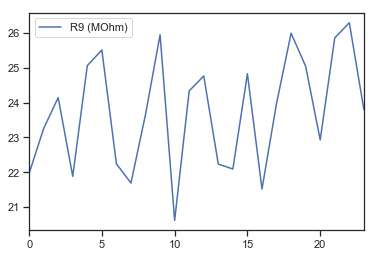

In [156]:
# Time Serie - R9
serie_9 = df_grouped2[["Hour","R9 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_9.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_9.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -1.549654
p-value: 0.508821


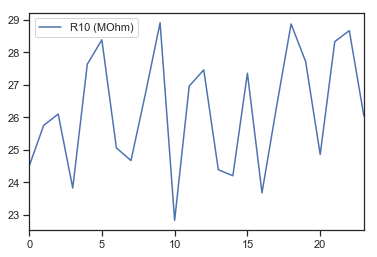

In [157]:
# Time Serie - R10
serie_10 = df_grouped2[["Hour","R10 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_10.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_10.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -1.453481
p-value: 0.556386


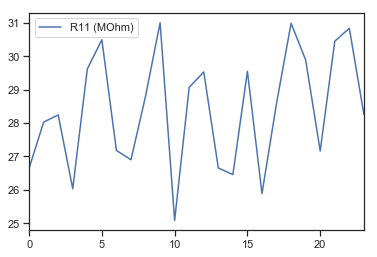

In [158]:
# Time Serie - R11
serie_11 = df_grouped2[["Hour","R11 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_11.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_11.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.783859
p-value: 0.823817


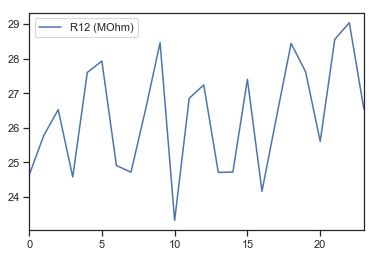

In [159]:
# Time Serie - R12
serie_12 = df_grouped2[["Hour","R12 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_12.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_12.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.494525
p-value: 0.893081


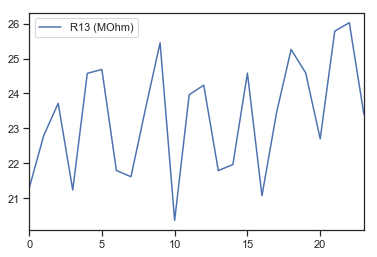

In [160]:
# Time Serie - R13
serie_13 = df_grouped2[["Hour","R13 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_13.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_13.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -0.494525
p-value: 0.893081


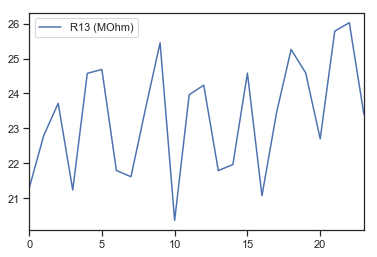

In [161]:
# Time Serie - R13
serie_13 = df_grouped2[["Hour","R13 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_13.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_13.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

ADF Statistic: -1.562140
p-value: 0.502579


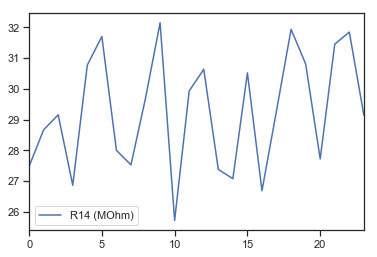

In [162]:
# Time Serie - R14
serie_14 = df_grouped2[["Hour","R14 (MOhm)"]]

# The time series is stacionary
result = adfuller(serie_14.iloc[:,1].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The graphic will help us to understand if there a stationary behaviour.
serie_14.plot()

# Looking at the graph and ADF statistic, we can see that there is no stationary behaviour in this case.

***Conclusions:***

- Considering what was done on this excercise, it seems that the linear models are more significant than the time series models.
- Some sensors were more sensible for a particular variable. 
- Naturally, no model presented stationarity.

***Considerations for future models:***

- There are some outliers in each one of the sensors. Technical issues? Is it normal? Shall we eliminate them?
- We could try with other kind of models (Decission Trees, Random Forest, Neural Networks...). In these scenarios, hyper-parameter tunning should be consider into account.
- We could try no linear models.
- We could try put on the model more than one variable, interacctions (X1*X2), etc...
- For the ARIMA model, it is possible that using other periods (hour, for instance) could present other results.
- We could try induce stationarity.

Jorge Polanco 26/Feb/20